In [18]:
import matplotlib.pyplot as plt
import numpy as np

# unconstrained function is distance between x2 and x3, and the point
def function(x):
    x2 = x[0]
    x3 = x[1]
    return ((-2 * x2 - 3 * x3 + 1) + 1) ** 2 + x2 ** 2 + (x3 - 1) ** 2


def gradient(x):
    x2 = x[0]
    x3 = x[1]
    return np.array([10 * x2 + 12 * x3 - 8, 20 * x3 + 12 * x2 - 14])

def Hessian(x):
    H = np.array([[10, 12], [12,20]])
    return H


In [19]:
xinit = np.array([1, -1])  # initial guess
g0 = np.array([-10, -22])  # gradient value at initial guess


t = 0.5 # t lies between 0 and 1 so I just chose right in the middle


def ils(x,alpha):  # ils=inexact line search-- outline of code given in class
    phi = function(x) - t * gradient(x).T @ gradient(x) * alpha
    if function(x - alpha * gradient(x)) > phi:
        alpha = .5 * alpha
        return ils(x, alpha)
    else:
        return alpha

xlistgrad = [xinit]  # initializing the stored x value
k = 0

# gradient descent -- outline of code in Files on canvas
while np.linalg.norm(gradient(xlistgrad[k])) > 0.000001:
    xprev = xlistgrad[k]
    alpha = 1
    alpha = ils(xprev, alpha)
    xnew = xprev - alpha * gradient(xprev)
    xlistgrad.append(xnew)
    k += 1


In [20]:
xx = xlistgrad[len(xlistgrad)-1]

x2g = xx[0]
x3g = xx[1]
x1g = 1 - 2 * x2g - 3 * x3g
print("x1 = " + str(x1g))
print("x2 = " + str(x2g))
print("x3 = " + str(x3g))
print("Initial guess for x2 and x3 are:" + str(xinit))

x1 = -1.071428520105548
x2 = -0.14285677056719456
x3 = 0.7857140204133124
Initial guess for x2 and x3 are:[ 1 -1]


In [21]:
# Newton's Method-- outline also in files on canvas
xlistnewt = [xinit]
k=0
while np.linalg.norm(gradient(xlistnewt[k])) > 0.000001:
    xprev = xlistnewt[k]
    alpha = 1
    xnew = xprev - alpha * np.linalg.solve(Hessian(xprev),gradient(xprev))
    xlistnewt.append(xnew)
    k += 1


In [22]:
xxn = xlistnewt[len(xlistnewt)-1]
x2n = xxn[0]
x3n = xxn[1]
x1n = 1 - 2 * x2n - 3 * x3n
print("Using Newton's Method with same initial guess:")
print("x1 = " + str(x1n))
print("x2 = " + str(x2n))
print("x3 = " + str(x3n))


Using Newton's Method with same initial guess:
x1 = -1.0714285714285712
x2 = -0.14285714285714235
x3 = 0.7857142857142854


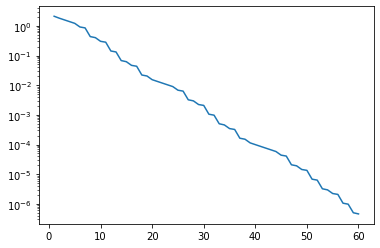

In [23]:
# Finding and plotting the error. The Newton's Method is one step, so no need to plot that.
xexact = np.array([-1/7 , 11/14])
error = []
for f in xlistgrad:
    err = np.linalg.norm(f - xexact)
    error.append(err)

iterations = np.arange(1,len(xlistgrad)+1)

plt.plot(iterations,error)
plt.yscale('log')
plt.show()
